# Modèles finaux, avec utilisation de SMOTE
### on a bien veillé à utiliser SMOTE seulement dans le train , pour éviter de biaiser le jeu de validation
### le meilleur résultat est 89% avec un réseaux de neurones 4 couches + dropout (64)

In [ ]:
# prediction sur les classes ou le label apparait au moins 10 fois pour l'application de SMOTE 
# l'oversampling permet au neural network permet d'apprendre d'autre classe 
# avant il n'apprenait 2 voir 3 classes au mieux , oversampling très benefique ici 

In [1]:
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from xgboost import XGBClassifier
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
import numpy as np
from imblearn.over_sampling import RandomOverSampler


### Import des données 

In [106]:
import pandas as pd 
df = pd.read_csv('body_base_notcut_clean_lemmatiser_notrand.csv',sep='\t',  encoding = "latin" )
df

df_c=df
df_c.columns= ['label', 'text', 'genre']

In [107]:
df_c.head()

,label,text,genre
0,0,acte SCÈNE Argélie Clytie ARGÉLIE Gardes veni...,Tragédie
1,0,acte SCÈNE PREMIÈRE Coriolan Albin CORIOLAN Q...,Tragédie
2,0,acte SCÈNE Érigone Iphis IPHIS non Madame mor...,Tragédie
3,1,SCÈNE PREMIÈRE Argante Nérine ARGANTE enfin N...,Comédie
4,2,PAN ET DORIS SCÈNE premier PAN figurer Valémo...,Pastorale


In [108]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 3 columns):
label    1025 non-null int64
text     1025 non-null object
genre    1025 non-null object
dtypes: int64(1), object(2)
memory usage: 24.1+ KB


### répartions des genres dans la base

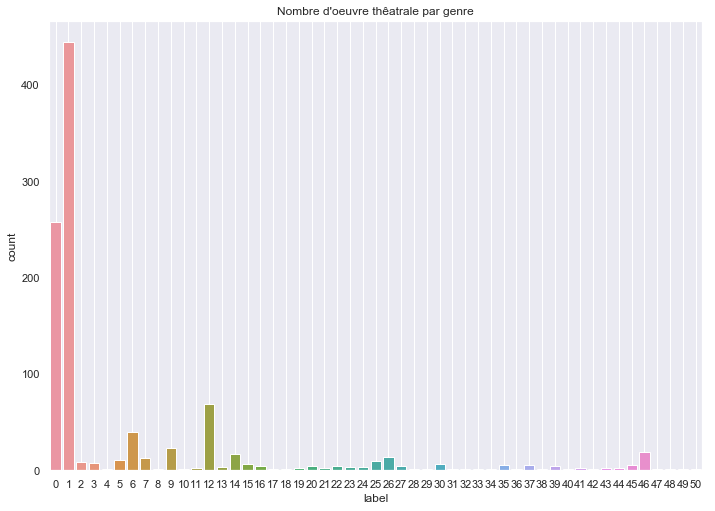

In [124]:
import seaborn as sn
sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.countplot(x='label', data=df_c )
plt.title("Nombre d'oeuvre thêatrale par genre")
plt.grid()
plt.show()

### SMOTE nécessite au moins 5 échantillons de meme classe dans le train
### on est obligé de garder les classes ayant plus de 10 occurences 
cela ramène la classification à une classification sur 10 classes 

In [4]:
df_6_i =df_c.groupby(['label']).count()>10
index = list(df_6_i.loc[df_6_i['text']==True].index)

In [82]:
from sklearn.model_selection import train_test_split
df_6 = df_c.loc[df_c.label.isin(index) ]
#df_6 =  df_6.sample(frac=1).reset_index(drop=True)
df_c=df_6

y = df_c.iloc[:,0]

list_text = df_c.iloc[:,1]
list_label = df_c.iloc[:,0]

#test_size = int(len(list_text)/8)
#test_set , train_set  = list_text[:test_size], list_text[test_size:]
#test_label, train_label = list_label[:test_size], list_label[test_size:]

train_set, test_set, train_label , test_label = train_test_split(list_text, list_label, stratify =list_label,
                                                     random_state=3,
                                                    test_size=0.1)

y_test, y_train  = test_label, train_label

In [6]:


df_6.head()

,label,text,genre
0,0,acte SCÈNE Argélie Clytie ARGÉLIE Gardes veni...,Tragédie
1,0,acte SCÈNE PREMIÈRE Coriolan Albin CORIOLAN Q...,Tragédie
2,0,acte SCÈNE Érigone Iphis IPHIS non Madame mor...,Tragédie
3,1,SCÈNE PREMIÈRE Argante Nérine ARGANTE enfin N...,Comédie
5,1,POLIXÈNE tragédie EN UN acte SCÈNE PREMIÈRE P...,Comédie


### Récupérer les noms de labels

In [83]:
list1 = list(df_6.genre)
list2 = list(set(list1))    
list2.sort(key=list1.index)  

In [9]:
list2

['Tragédie',
 'Comédie',
 'Parodie',
 'Proverbe',
 'Farce',
 'Monologue',
 'Tragi-comédie',
 'Drame',
 'Opéra',
 'opuscule dramatique']

### Mot important 

In [9]:
 #TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
X = count_vect.fit_transform(list_text)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X)
X_train_tfidf.shape

# Mot le plus important au sens tfidf pour tous les text 
for e in list(np.argmax(X_train_tfidf, axis=1)):
    i = e.tolist()
    i = i[0][0] 
    
    print(count_vect.get_feature_names()[i])


benjamine
cléanthe
néron
alcandre
dorante
gesler
gusman
cinna
cassandre
alceste
agrippine
judith
phalante
dona
célante
blaise
marmuse
étéocle
trufaldin
agamemnon
arlequin
mananville
chimène
philidor
abraham
io
catilina
édouard
coligny
antoine
tartuffe
roger
livie
eucherius
mercure
sertorius
orgon
acante
japhet
esther
sec
comtesse
bérénice
argentin
momus
desgrais
abbé
léandre
soliman
haman
campagnard
cléante
cendrillon
clown
sainville
hollande
décousu
nicomède
mari
oronte
capitan
tancrède
ernest
jésus
pélée
polixène
pyrrhus
mathurin
enfant
ligdamon
ésope
thibaut
inville
bonaventure
albert
ergaste
warwick
jason
dutremblet
ribercour
robespierre
gilles
vulcain
conine
lisandre
seringuet
cécile
séjanus
olimpe
orphise
dynamis
bête
eve
triollet
hippolyte
darius
trotberg
acanthe
vuide
baron
sifroy
lélio
orgon
gilles
zamire
oedipe
angélique
prêtre
gusmand
arthénice
granville
harpin
andronic
achille
sganarelle
gustave
agante
pillier
florville
idoménée
arlequin
beaubourg
gilles
cléopâtre
trasimond

In [81]:
text1 = X_train_tfidf[2]
# Récuperer les index des  30 mots les plus important pour un text selon tfidf
index_features  = text1.toarray()[0].argsort()[-30:][::-1]
#print(index_features)
for i in index_features :
    #print(i)
    print(count_vect.get_feature_names()[i])

dorimène
lisette
intendante
dorante
merlin
clitandre
comtesse
angélique
lansquenet
madame
chevalier
caissier
éraste
bien
le
je
topase
bellemonte
jouer
monsieur
la
point
eh
carte
marquis
argent
il
plus
jeu
dire


### Réindexer les labels 

In [10]:
# réindexer les labels 
def reindex_label(y):
    label_list = list(set(y))
    y_ranked  =[]
    for label in y :
        for i in range(len(label_list)) :
             if label_list[i] == label : 
                    y_ranked.append(i)
    return y_ranked
                    
y_ranked =reindex_label(y)           
#y_test_r, y_train_r = y_ranked[:test_size], y_ranked[test_size: ]
__, __, y_train_r , y_test_r = train_test_split(list_text, y_ranked, stratify=list_label,
                                                     random_state=3,
                                                    test_size=0.1)

# Vectoriser + Smote
### on fait bien attention à n'appliquer SMOTE que sur le train_set, sinon cela biaiserai nos jeux de test et résultats 

In [84]:
count_vect = CountVectorizer()

list_text = list(train_set)+list(test_set )
X = count_vect.fit_transform(list_text)
X_train, X_test = X[:len(train_set), :], X[len(train_set):, :]
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

### Xgboost  Smote

In [85]:

e = Pipeline([ ('tfidf', TfidfTransformer()), ('clf', XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1))])

text_clf = e.fit(X_resampled, y_resampled)
xgboost_pred_smote = e.predict_proba(X_test)
np.mean(e.predict(X_test)==y_test)

0.8241758241758241

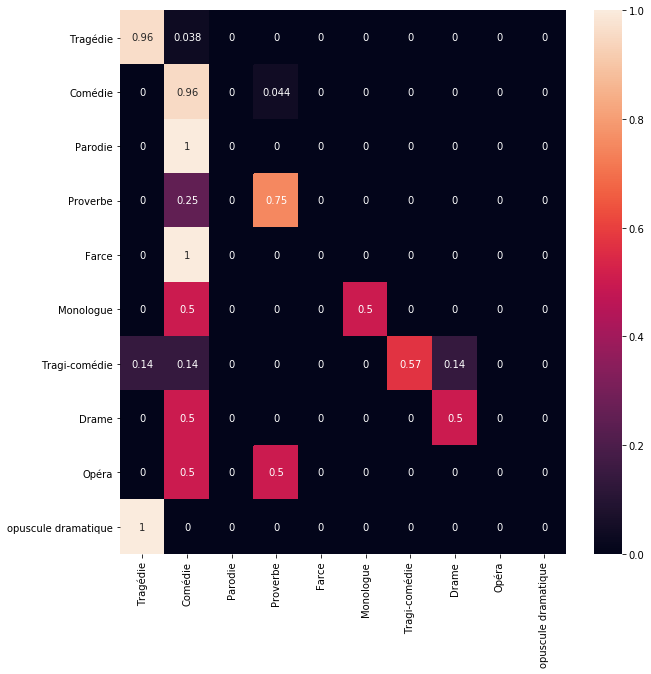

In [11]:
y_pred1 = np.argmax(xgboost_pred_smote, axis = 1)
y_test1 = y_test_r
array = confusion_matrix(y_test1, y_pred1)
array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]


df_cm = pd.DataFrame(array, index = list2 , columns = list2)
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)
plt.show()

### Xgboost Sans SMOTE

In [14]:

e = Pipeline([ ('tfidf', TfidfTransformer()), ('clf', XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1))])

text_clf = e.fit(X_train, y_train)
xgboost_pred = e.predict_proba(X_test)
np.mean(e.predict(X_test)==y_test)

0.8287292817679558

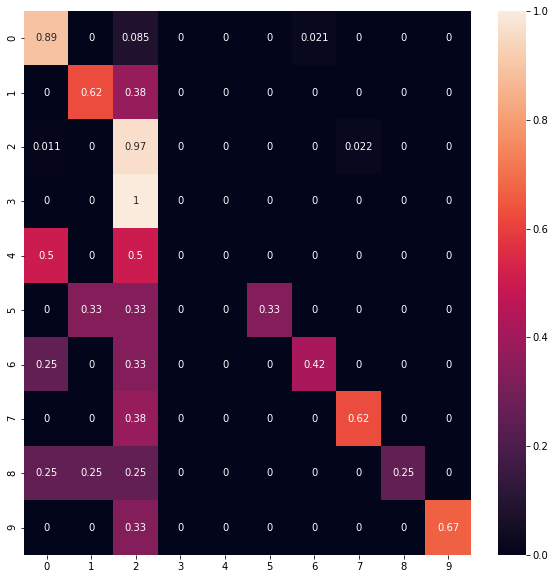

In [81]:
y_pred1 = np.argmax(xgboost_pred, axis = 1)
y_test1 = y_test_r
array = confusion_matrix(y_test1, y_pred1)
array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]


df_cm = pd.DataFrame(array, index = list(range(0,10)) , columns = list(range(0,10)))
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)
plt.show()

# Neural Network
### celui qui nous donne le meilleur résultat 
### SMOTE a été très bénéfique sur le réseaux de neuronnes 4 couches (64) + dropout
### car les réseaux de neuronnes sont trés sensible aux asymétries de classe sur la base de données 
### 89% de précision , plus prédit même les genres sous représentés 

In [9]:
import keras

data = X
print(data.shape)

test_size = int(data.shape[0] /5)
test_data , train_data  = data[:test_size, :], data[test_size:, :]
y_ranked  =reindex_label(y)           
y_test_r, y_train_r = y_ranked[:test_size], y_ranked[test_size: ]
test_labels, train_labels = y_test_r, y_train_r



Using TensorFlow backend.


(907, 66471)


In [11]:
import keras

data = X
print(data.shape)

test_size = int(data.shape[0] /5)
test_data , train_data  = test_set, train_set
y_ranked  =reindex_label(y)           
#y_test_r, y_train_r = y_ranked[:test_size], y_ranked[test_size: ]
test_labels, train_labels = y_test_r, y_train_r


(907, 66471)


In [13]:
X_train =train_data
X_test =test_data
y_train , y_test =  train_labels , test_labels

In [24]:
# Oversampling
from imblearn.over_sampling import SMOTE, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
print(X_resampled.shape, y_resampled.shape)

(3990, 66471) (3990,)


In [25]:
x_train, y_train = X_resampled, y_resampled

In [27]:
import keras

import numpy as np
from keras.utils import to_categorical

def vectorize_sequences(sequences, dimension=108671):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results



#One hot encoder 
y_resampled = to_categorical(y_resampled)
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

#y_test, y_train  = y[:test_size, :], y[test_size:,:]


In [56]:
# moins bon avec le dropout model.add(Dropout(0.5))

from keras import models
from keras import layers
from keras.layers import Dense, Dropout, Activation

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(66471,)))
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(layers.Dense(len(set(y)), activation='softmax'))

In [57]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

y_train.shape

(3990, 10)

In [58]:
x_val = x_train[:400,:]
partial_x_train = x_train[400:,:]
y_val = y_train[:400, :]
partial_y_train = y_train[400:,:]

In [59]:
history = model.fit(partial_x_train, partial_y_train, epochs=30, batch_size=512, validation_data=(x_val, y_val))


Train on 3590 samples, validate on 400 samples
Epoch 1/30
3590/3590 [==============================] - 4s 1ms/step - loss: 2.4041 - acc: 0.2178 - val_loss: 1.8073 - val_acc: 0.2775
Epoch 2/30
3590/3590 [==============================] - 4s 980us/step - loss: 1.8065 - acc: 0.3786 - val_loss: 2.1029 - val_acc: 0.1950
Epoch 3/30
3590/3590 [==============================] - 4s 1ms/step - loss: 1.5579 - acc: 0.4811 - val_loss: 1.3502 - val_acc: 0.6775
Epoch 4/30
3590/3590 [==============================] - 4s 1ms/step - loss: 1.2892 - acc: 0.5897 - val_loss: 1.0647 - val_acc: 0.7775
Epoch 5/30
3590/3590 [==============================] - 3s 955us/step - loss: 1.1140 - acc: 0.6462 - val_loss: 0.7823 - val_acc: 0.8375
Epoch 6/30
3590/3590 [==============================] - 4s 1ms/step - loss: 0.9959 - acc: 0.6852 - val_loss: 0.5683 - val_acc: 0.8800
Epoch 7/30
3590/3590 [==============================] - 3s 949us/step - loss: 0.9057 - acc: 0.7248 - val_loss: 0.4903 - val_acc: 0.9150
Epoch 8/3

In [60]:
y_pred = model.predict(X_test)
nn_pred = model.predict_proba(X_test)
np.mean(np.argmax(y_pred, axis=1)==y_test)

d:\programmes\anaconda2\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


0.0

In [61]:
np.mean(np.argmax(y_pred, axis=1)==np.argmax(y_test,axis=1))

0.8901098901098901

In [63]:
#resultat
#neural_net2_best = nn_pred
#neural_net1 = nn_pred

## Résultat réseaux de neurones 89%

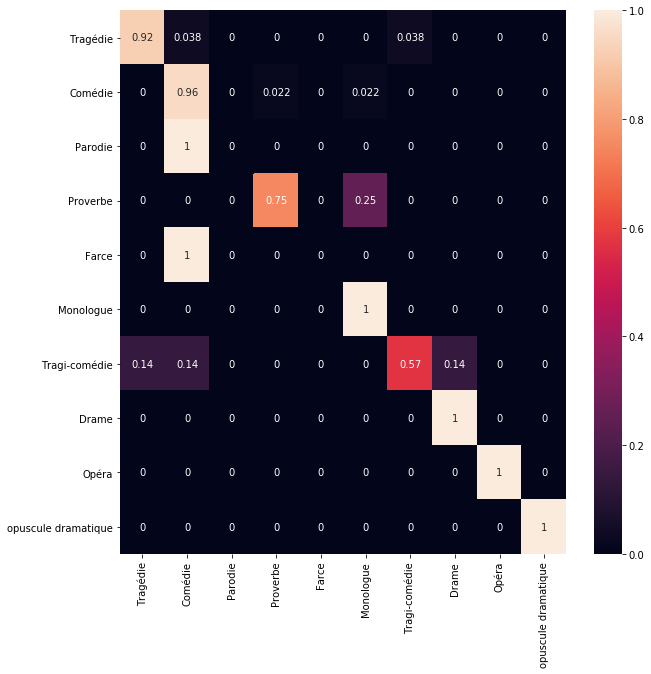

In [62]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred1 = np.argmax(y_pred, axis = 1)
y_test1 = np.argmax(y_test, axis = 1)
array = confusion_matrix(y_test1, y_pred1)
array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]


df_cm = pd.DataFrame(array, index = list2 , columns = list2 )
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)
plt.show()

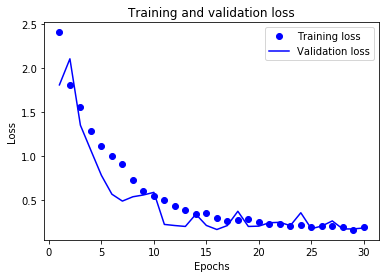

In [64]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

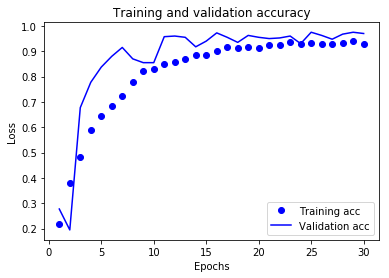

In [65]:
plt.clf()
acc_values = history_dict['acc']
val_acc= history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Log loss des modèles 

In [89]:
nn_pred.shape

(91, 10)

In [116]:
from sklearn.metrics import log_loss
print('Neural Network 2 log_loss ' , log_loss(y_test, nn_pred, eps=1e-15, normalize=True, sample_weight=None, labels=None))
print('Xgboost log_loss ' , log_loss(y_test, xgboost_pred_smote, eps=1e-15, normalize=True, sample_weight=None, labels=None))
print('Neural Network 1 log_loss ' , log_loss(y_test, neural_net1, eps=1e-15, normalize=True, sample_weight=None, labels=None))


Neural Network 2 log_loss  1.314945417193464
Xgboost log_loss  0.5532614323918217
Neural Network 1 log_loss  1.962886321119866


## Combinaisons linéaire de modèles
### moins bon résultat en précision
Objectif augmenter la certitude du modèle => réduire la log_loss

In [109]:
predictions = []
predictions.append(nn_pred)
predictions.append(neural_net1)
#predictions.append(xgboost_pred)
predictions.append(xgboost_pred_smote)


In [110]:
from scipy.optimize import minimize
def log_loss_func(weights):
    ''' scipy minimize will pass the weights as a numpy array '''
    final_prediction = 0
    for weight, prediction in zip(weights, predictions):
            final_prediction += weight*prediction
    return log_loss(y_test, final_prediction)

In [111]:
starting_values = [0.1]*len(predictions)
cons = ({'type':'eq','fun':lambda w: 1-sum(w)})
bounds = [(0,1)]*len(predictions)
res = minimize(log_loss_func, starting_values, method='SLSQP', bounds=bounds, constraints=cons)

In [112]:
print('Ensemble Score: {best_score}'.format(best_score=res['fun']))
print('Best Weights: {weights}'.format(weights=res['x']))

Ensemble Score: 0.5184585008603361
Best Weights: [0.23609092 0.02953061 0.73437847]


In [113]:
print(res)

     fun: 0.5184585008603361
     jac: array([0.15343836, 0.2962955 , 1.00339114])
 message: 'Optimization terminated successfully.'
    nfev: 31
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.23609092, 0.02953061, 0.73437847])


In [114]:
comb_lin_pred = 0.2361 * nn_pred + 0.02953*neural_net1 + 0.73437847* xgboost_pred_smote

In [99]:
(np.argmax(comb_lin_pred,axis=1)==y_test_r).mean()

0.8461538461538461

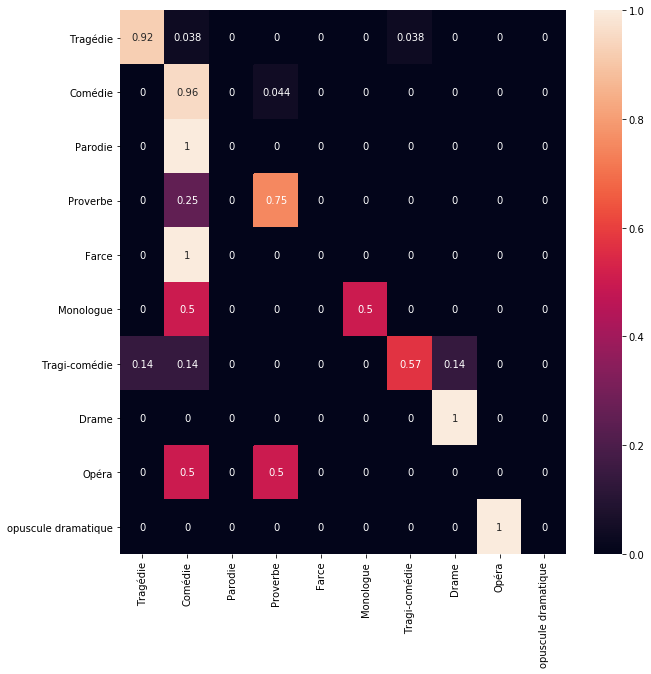

In [101]:
y_pred1 = np.argmax(comb_lin_pred,axis=1)
y_test1 = y_test_r #np.argmax(y_test,axis=1)
array = confusion_matrix(y_test1, y_pred1)
array = array.astype('float') / array.sum(axis=1)[:, np.newaxis]


df_cm = pd.DataFrame(array, index = list2 , columns = list2)
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)
plt.show()

In [155]:
np.argmax(comb_lin_pred,axis=1)

array([0, 1, 2, 2, 0, 6, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 6, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 2, 6, 2, 7,
       2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 8, 2, 2, 7, 7, 0, 6, 0, 0, 0, 2, 2,
       2, 2, 7, 0, 6, 6, 2, 2, 9, 2, 2, 0, 2, 2, 2, 0, 2, 2, 7, 0, 6, 0,
       2, 2, 2, 2, 7, 0, 2, 2, 0, 0, 0, 0, 2, 0, 6, 0, 2, 0, 2, 7, 2, 2,
       1, 2, 2, 2, 2, 6, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 0, 6,
       0, 2, 1, 2, 0, 3, 2, 2, 9, 2, 9, 0, 2, 0, 2, 2, 5, 2, 2, 2, 0, 6,
       2, 0, 2, 2, 7, 0, 2, 2, 2, 2, 6, 2, 2, 3, 0, 7, 6, 2, 2, 2, 9, 0,
       2, 2, 2, 0, 0], dtype=int64)